# The GHZ-Game


### Solve "unsolvable" problems using Quantum Computers
 

## Usage instructions for the user interface
1. "Ctrl -" and "Ctrl +" (or "command -", "command +") adjust the zoom level to fit the text to the browser window
* "Shift Enter" executes the interactive cells (might need to click the cell, first)
* Execute all the interactive cells ("In [1]:", etc)
* In case a cell is not formatted correctly, try to double-click and then "Shift Enter" to re-execute
* Interactive cells can be modified, if needed

First we need to install some prerequisits. You do not have to understand them for now (just click on the cells and press "Shift Enter"):

In [1]:
#import prerequisits
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, BasicAer
from ipywidgets import interact
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from GHZGame.ghzGame import *

In [2]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(3) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(3) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend, here a Quantum simulator

# Let's play a game!

We form two teams of three players. Your team is called "Team Einstein" and your team members are Alice and Bob (and you, of course). The other team is called "Team Schrödinger" and - as the name indicates - will be able to exploit quantum mechanics.

## The rules for this game are as follows:

- Each player thinks of a color (red or blue) and a shape (star or rectangle).

- The game master than asks either all players for a color or one for a color and two for a shape. In total, four different kinds of questions can be asked:


1. Color, color, color
2. Color, shape, shape
3. Shape, color, shape
4. Shape, shape, color

Which of the four sets of questions is used, is chosen randomly.

- Once the questions are asked, the team members are not allowed to communicate anymore. Before that, the team members are allowed to agree on a strategy.

- In the case that all players are asked for a color (1.), the team wins if an even number of people answered with red. Otherwise (when two are asked for a shape and only one for a color) they win if an uneven number of players answered with either red or star depending on the question they were asked. 

### Example:

Question: Color, color, color

Answer: red, red, blue
> right answer, even number of red.

Question: Color, shape, shape

Answer: red, star, rectangle
> worng answer, even number of red and star, should be uneven.


If you think about a *real* object that will answer the question about color and shape, each team member could  choose to think of one of the following four objects.  You are allowed to change your mind as often as you want as long as you do not know whether your team members were asked for a color or a shape:
![title](GHZGame/shapes.png)

## Make your choices:
(The 0 or 1 inside the brakets of the drop down fields below show the corresponding bit value. 0 is interpreted as red or star and 1 as blue or rectangle.)

In [3]:
print ('Your team can now discuss which values each of you will say when asked either for the color or the shape of your object.')
print ('')

print ('Alice:')
interact(Alice, AlicesColor={'red (0)':1,'blue (1)':-1}, AlicesShape={'star (0)':1,'rectangle (1)':-1})

print ('Bob:')
interact(Bob, BobsColor={'red (0)':1,'blue (1)':-1}, BobsShape={'star (0)':1,'rectangle (1)':-1})

print ('You:')
interact(You, YourColor={'red (0)':1,'blue (1)':-1}, YourShape={'star (0)':1,'rectangle (1)':-1})
print ('')

Your team can now discuss which values each of you will say when asked either for the color or the shape of your object.

Alice:


interactive(children=(Dropdown(description='AlicesColor', options={'red (0)': 1, 'blue (1)': -1}, value=1), Dr…

Bob:


interactive(children=(Dropdown(description='BobsColor', options={'red (0)': 1, 'blue (1)': -1}, value=1), Drop…

You:


interactive(children=(Dropdown(description='YourColor', options={'red (0)': 1, 'blue (1)': -1}, value=1), Drop…

If you are confident with your choices try it out here. Do you have a 100% winning strategie that gives the correct answer for each of the four sets of questions? ("If you loose once, you will stay in prison forever".)

In [4]:
# runs the experiment for both teams, asking all four queations.
runExperiment()

Round  1 , Question  1
Team Einstein was wrong, Team Schrödinger was right
Round  2 , Question  2
Both teams were right
Round  3 , Question  3
Both teams were right
Round  4 , Question  4
Both teams were right


## Why has the other team a 100% winning strategie while your team does not?

To find out what they do differently you talk to team Schrödinger and their team member Erwin explains what they did.

Bob: 
"*How did you do that? Isn't it impossible to constantly win this game? I mean look at this, we tried to solve it mathematically and the problem is unsolvable, you must have cheated!*"

(For easier calculations we replaced 0 for red and star with 1 and 1 for blue and rectangle with -1)
    

    
   ![title](GHZGame/proof1.png)

Erwin (from team Schrödinger): 
"*Yes, you are right, but we did not cheat! We used so-called qubits and entanglement and with that it is possible to always win.*"

Bob: 
"*What exactly is that and how does it work?*"
    
Erwin: 
"*Each of us had a qubit. You can represent them as a little sphere with a vector pointing in 
    one direction. This vector describes the state the qubit is currently in.*"

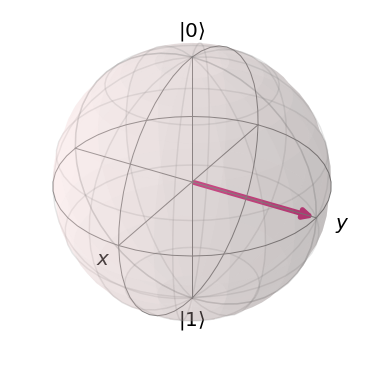

In [5]:
plot_bloch_vector([0,1,0])

Erwin: 
"*However - as you know from quantum mechanics - you cannot see in which state the qubit is, but 
    need to measure it to find out something about its state. The result of a measurement is always 
    either 0 or 1. These values correspond to the shape and color of the objects in such a way that we 
    answered with red or star whenever measuring 0 and accordingly with blue or rectangle when measuring 1.
    For example, when asked for the color of your object and you are measuring a 1 you answer blue. For a 0 
    your answer would be red.*
    
*The vector in the sphere above, is in a position other than 0 (top of the sphere) or 1 (at the bottom). When 
    measuring, you would still get one of these results. In this case, it would be 0 with 50% probability 
    and 1 with 50% probability. The actual result for a single measurement is random.*"

Erwin: 
"*So we used qubits that were entangled with each other and different "observables" of a quantum object. Normally, a Quantum Computer measures the Z-basis of a qubit but we measured X when asked for a color and when asked for a shape we measured Y. The result for the Y measurement in the example above 
    would always be 1, instead of the 50% probability of 0 or 1 when measuring the Z-value. 
    I will explain later why exactly this works but as all three of our qubits were entangled, we got the correct answer for all cases.*"

Bob: 
"*But isn't that against the rule to not communicate with each other after the question was asked?*"
    
Erwin: 
"*No it is not because the qubits do not communicate with each other. They are just correlated in 
    such a way that they cannot be seen as independent. We can just try it out :) Before we start we 
    need to bring all our three qubits into the so-called GHZ-state. This is an entangled state that creates 
    dependencies between the qubits. To do so we need to apply the following Quantum circuit:*"

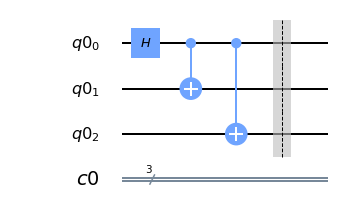

In [6]:
# this circuit is explained in more detail later on.
qc = QuantumCircuit(q, c)
# create GHZ state
qc.h(q[0]) #apply H-gate to the first qubit
qc.cx(q[0],q[1]) #entangle the first two qubits
qc.cx(q[0],q[2]) #entangle the first and the last qubit
qc.barrier() #visual seperation (optional)
qc.draw(output='mpl')

Erwin:  
"*The first gate we see in the circuit above is the H-gate which brings the qubit into a 
            Superposition. When measured it has a 50% probability of beeing 0 and a 50% probability of beeing 1. *"

"*The other gates we see look different. They are called CNOT-gates and operate on 2 qubits. 
            The qubit with the dot is the control bit and the other one with the cross sign is the target 
            bit. If the control bit is one an X-gate is applied to the target bit. Otherwise nothing happens.*"
            
(An X-gate cannot be found in the picture above. The X-gate is similar to a NOT-gate used on classical computers. When applied to a qubit in state $ \;\;|1\rangle $ it becomes $ \;\;|0\rangle $ and the other way around.)

Erwin:  "*On a Quantum Computer you can only measure what 
            points in the direction of the Z-axis. Therefore, we need to make the state vector point in the  direction to derive information about the X or Y basis. When you are asked for the color (corresponds to x value) of your qubit you need to apply an 
            H-gate and measure the state afterwards. Applying the H-gate turns your state vector 180° around the 
            Z-axis and 90° around the X-axis and therefore, enables you to read out the X-value.* 
            
*When asked for
            the shape you apply the sdg-gate followed by an H-gate and then measure. This corresponds to 
            a Y measurement (shape) as the sdg gate turns the object by 270° around the Z-axis so that the 
            shape of the object is now pointing towards X. When applying an H-gate afterwards, it turns the 
            object 180° around the Z-axis and 90° around the Y-axis so that it is now pointing towards Z which is the only axis we are able to measure.*
            
*You can try to reconstruct the movements of a single qubit using the visualization below. Whether 
            the top or bottom side of the dice is revealed in a measurement is randomly chosen. In the initial 
            GHZ-state the dice is pointing up with a black side so that a color is pointing towards X and a
            shape towards Y.*"

![title](GHZGame/visualization.png)

Erwin:  
"*The results for each player seems to be perfectly random, but all three results in fact are 
            strongly correlated and not independent. This is caused by the entanglement. The Bloch Sphere
            visualization can only be used for a single qubit, but not for the entire (entangled) system 
            of multiple qubits.*"

To measure the Y-basis of a quantum state, the following quantum circuit can be used:


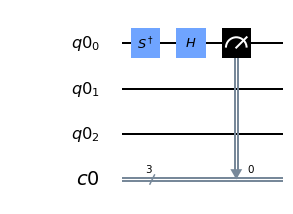

In [7]:
print ("To measure the Y-basis of a quantum state, the following quantum circuit can be used:")
qc = QuantumCircuit(q, c) #create a new Quantum circuit
# If measuring the X or Z-value, this step is not necessary:
#apply sdg-gate to qubit 0. Vector moves 90° counterclockwise around the Z-axis (e.g. from y-basis to x-basis)
qc.sdg(q[0]) 
# If measuring the Z-value, this step is not necessary:
#apply H-gate to qubit 0. Vector moves 180° around the Z-axis and 90° around the Y-axis (e.g. from x-basis to z-basis)
qc.h(q[0]) 
#create measurement gate for qubit 0
qc.measure(q[0],c[0]) 
#draw the circuit
qc.draw(output='mpl') 

    Can you modify the cell above to build a Quantum circuit that is suitable for an X measurement by 
    commenting out or deleting the line that is not necessary? 

    Can you do the same for a Z-measurement? 

    A quantum circuit that can be used when your team is asked for the XYY-values therefore, could look like
    this:
    (XYY means that Alice (player 1) is asked for the color while Bob and you (player 2 and 3) are asked for 
    a shape.
    0 -> red or star
    1 -> blue or rectangle)

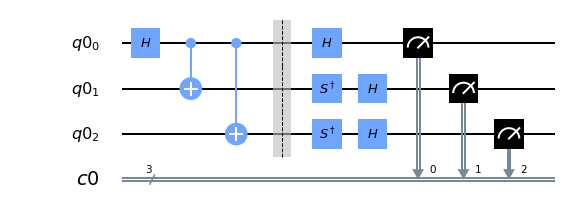

In [8]:
qc = QuantumCircuit(q, c) #create a new Quantum circuit
# create GHZ state
qc.h(q[0]) #apply H-gate to the first qubit
qc.cx(q[0],q[1]) #entangle the first two qubits
qc.cx(q[0],q[2]) #entangle the first and the last qubit
qc.barrier() #visual seperation (optional)

# measure each qubit accordingly
qc.h(q[0]) #apply H-gate to the first qubit (for x-value, player 1)
qc.sdg(q[1]) #apply sdg-gate to the second qubit
qc.h(q[1]) #apply H-gate to the second qubit (for y-value, player 2)
qc.sdg (q[2]) #apply sdg-gate to the third qubit
qc.h(q[2]) #apply H-gate to the third qubit (for y-value, player 3)
qc.measure(q,c) #create measurement gates for all qubits
qc.draw(output='mpl') #draw the circuit

# So now let's play again, using this new strategy

To generate a random question execute the next cell:

In [9]:
question = randomQuestion()

The question your team is getting asked is:
Shape, color, shape


Try to build a quantum circuit that can be used to answer these questions on the next slide and provide the right answers to your team members (if you need  help use the previous slides as examples or continue to the next slides):

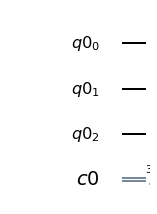

In [10]:
qc = QuantumCircuit(q, c) #creates a new Quantum circuit

#TODO: create GHZ-state (try not to use the predefined function)

#TODO: apply gates according to the question above

qc.draw(output='mpl') #draw the circuit

## Now let's test your Quantum circuit:

In [11]:
# runs your quantum circuit 100 times on a simulator
simulate(qc, q, c, 100)

{'000': 100}

Now you can check your results for yourself. You get several different answers and this can be correct as the requirements of an even or uneven number of ones or zeros can be satisfied in multiple ways.

### Do you think your answers were right? Check it here:

In [12]:
# compares whether the measurement results from your circuit correspond to the question asked
circuitCheck(qc, q, c, question)

Hmmm... There might still be a mistake.


## Need some help? 
(Otherwise skip this cell)

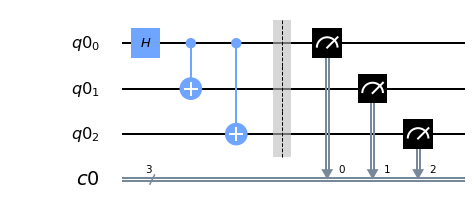

In [13]:
qc = QuantumCircuit(q, c) #create a new Quantum circuit

#creates GHZ-state
qc.h(q[0]) #apply H-gate to the first qubit
qc.cx(q[0],q[1]) #entangle the first two qubits
qc.cx(q[0],q[2]) #entangle the first and the last qubit
qc.barrier() #visual seperation (optional)

#TODO: apply gates according to the question above - choose the right ones
#qc.sdg(q[0]) #apply sdg-gate to the second qubit
#qc.h(q[0]) #apply H-gate to the first qubit
#qc.sdg(q[1]) #apply sdg-gate to the second qubit
#qc.h(q[1]) #apply H-gate to the second qubit
#qc.sdg (q[2]) #apply sdg-gate to the third qubit
#qc.h(q[2]) #apply H-gate to the third qubit 

#Hint: only h-gate for x-value, both gates for y-value


qc.measure(q,c) #create measurement gates for all qubits
qc.draw(output='mpl') #draw the circuit

To check your answer return to the previous slide.

In [14]:
# prints out the correct code for your questions
correctAnswer(question)

Copy the following code in the cell above:


qc.sdg(q[0])
qc.h(q[0])
qc.h(q[1])
qc.sdg(q[2])
qc.h(q[2])


You: 
"*Cool it works, and with this Quantum strategy the team can always win, no matter which question is asked. But still I don't really understand why and how?!*"

## Background Information

Entangled qubits have a strong dependency. Therefore, their states cannot be described individually but only in a correlated mannner.
In the GHZ state, for exmaple, when performing an XXX-measurement only the results $\;\; |000\rangle, |011\rangle,  |101\rangle $ and $ \;\;|110\rangle $ occur.
The fascinating thing is each qubit when observed individually (for example when only looking at the first qubit), behaves perfectly random. But when considering the whole system a dependency becomes obvious. 

A commonly known entangled state is the Bell state.The state can be $\;\frac{|00\rangle + |11\rangle}{\sqrt{2}}\;\;$. When measuring the first qubit in state 1 we can already say with certainty that the result of the second measurement will also be 1 as a state with mixed results can not occur.

But let's go back to our Experiment. We remember the GHZ-state from above:

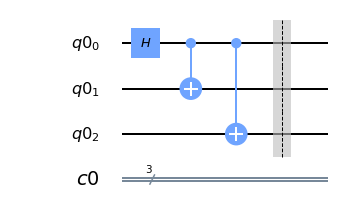

In [15]:
qc = QuantumCircuit(q,c)
ghz_state(qc,q).draw(output='mpl')

Which outcomes do you expect when executing this circuit and using the z-axis as measurement basis?

In [16]:
quiz()

(a) All 8 possible states equally mixed (|000>, |001>, |010>, ..., |110>, |111>)
(b) A random distribution across all 8 states (|000>, |001>, |010>, ..., |110>, |111>)
(c) Measurement result in 50% is state |000> and in 50% is state |100>
(d) Measurement result in 50% is state |000> and in 50% is state |111>
 
No, try again!


Now try it out:

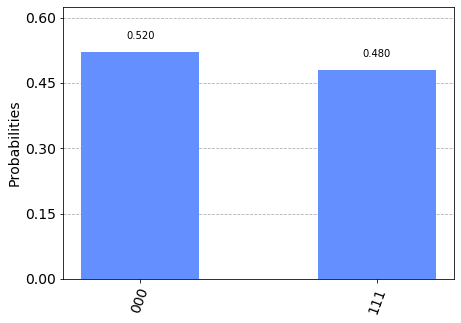

In [17]:
plot_histogram(simulate(qc, q, c, 100)) # Visualise the results

Interestingly the only results that you get are either $ \;\;|000\rangle $ or $ \;\;|111\rangle $ with roughly 50/50 probability (Increase the number of shots to get more accurate results - closer to 50%).
This is because q0 is brought into a superposition. In case it is 0 the two CNOT gates do not change the value of the other two qubits. If it is one both of the other values (which initially were 0) are flipped to 1.

This becomes obvious when looking at the state which can be written as $\;\;|GHZ\rangle=\frac{|000\rangle + |111\rangle}{\sqrt{2}}\;\;$ and only consists of these two basis states.

And why does it always work for answering the questions of the experiment above?

When measuring on the XXX-basis, we apply a Hadamard-gate to each of the qubits.
A Hadamard-gate can be described with the following matrix:

$$ H=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

If we want to apply the H-gate 3 times (one time on each qubit) we can use the tensor product. For the tensor product A⨂B each block aij*B is calculated. For the tensor product of three Hadamard gates this means:
$$ H⨂H⨂H=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$
$$=  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} H & H \\ H & -H \end{pmatrix}=   \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} ⨂\frac 1 {2}\begin{pmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{pmatrix}$$
$$= \frac 1 {2\sqrt{2}} \begin{pmatrix} 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & -1 & 1 & -1 & 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 & 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 & 1 & -1 & -1 & 1 \\ 1 & 1 & 1 & 1 & -1 & -1 & -1 & -1 \\ 1 & -1 & 1 & -1 & -1 & 1 & -1 & 1 \\ 1 & 1 & -1 & -1 & -1 & -1 & 1 & 1 \\ 1 & -1 & -1 & 1 & -1 & 1 & 1 & -1\end{pmatrix}$$


The states $ \;\;|0\rangle $ and $ \;\;|1\rangle $ can also be represented by the vectors $ \;\;|0\rangle=\begin{pmatrix} 1 \\ 0\end{pmatrix}|1\rangle=\begin{pmatrix} 0 \\ 1 \end{pmatrix} \;\;$

Therefore, the GHZ state can also be represented as a vector:
$$|GHZ\rangle=\frac{|000\rangle + |111\rangle}{\sqrt{2}} = \frac{|0\rangle |0\rangle |0\rangle+ |1\rangle |1\rangle |1\rangle}{\sqrt{2}} $$
$$ =\frac {\begin{pmatrix} 1 \\ 0\end{pmatrix}⨂\begin{pmatrix} 1 \\ 0\end{pmatrix}⨂\begin{pmatrix} 1 \\ 0\end{pmatrix}+ \begin{pmatrix} 0 \\ 1\end{pmatrix}⨂\begin{pmatrix} 0 \\ 1\end{pmatrix}⨂\begin{pmatrix} 0 \\ 1\end{pmatrix}}{\sqrt{2}}$$
$$ =\frac {\begin{pmatrix} 1 \\ 0\end{pmatrix}⨂\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}+ \begin{pmatrix} 0 \\ 1\end{pmatrix}⨂\begin{pmatrix} 0 \\ 0\\ 0\\ 1\end{pmatrix}⨂\begin{pmatrix} 0 \\ 1\end{pmatrix}}{\sqrt{2}}$$
$$ =\frac 1 {\sqrt{2}}\left( {\begin{pmatrix} 1 \\ 0 \\0 \\0 \\ 0\\ 0\\ 0 \\ 0\end{pmatrix}+ \begin{pmatrix} 0 \\ 0\\ 0\\ 0 \\0 \\0\\ 0\\ 1\end{pmatrix}} \right)
= \frac 1 {\sqrt{2}} {\begin{pmatrix} 1 \\ 0 \\0 \\0 \\ 0\\ 0\\ 0 \\ 1\end{pmatrix}}$$




$$\left( {\begin{pmatrix} 1 \\ 0 \\0 \\0 \\ 0\\ 0\\ 0 \\ 0\end{pmatrix}+ \begin{pmatrix} 0 \\ 0\\ 0\\ 0 \\0 \\0\\ 0\\ 1\end{pmatrix}} \right)$$

When applying three Hadamard-gates to the GHZ state:
$$\frac 1 {2\sqrt{2}} \begin{pmatrix} 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & -1 & 1 & -1 & 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 & 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 & 1 & -1 & -1 & 1 \\ 1 & 1 & 1 & 1 & -1 & -1 & -1 & -1 \\ 1 & -1 & 1 & -1 & -1 & 1 & -1 & 1 \\ 1 & 1 & -1 & -1 & -1 & -1 & 1 & 1 \\ 1 & -1 & -1 & 1 & -1 & 1 & 1 & -1\end{pmatrix}*\frac 1 {\sqrt{2}} {\begin{pmatrix} 1 \\ 0 \\0 \\0 \\ 0\\ 0\\ 0 \\ 1\end{pmatrix}}= \frac 1 {4} {\begin{pmatrix} 2 \\ 0 \\0 \\2 \\ 0\\ 2\\ 2 \\ 0\end{pmatrix}} $$
$$= \frac 1 {4} (2*|000\rangle+0*|001\rangle+0*|010\rangle+2*|011\rangle+0*|100\rangle+2*|101\rangle+2*|110\rangle+0*|111\rangle)$$
$$= \frac 1 {2} (|000\rangle+|011\rangle+|101\rangle+|110\rangle)$$

As expected only the results with an even number of ones occur.

When measuring a Y-value we need an additional gate: $$ S^†= \begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix}$$

For the YYX-measurement we would apply the sdg-gate to qubit 0 and 1 follwed by a Hadamard-gate on all three qubits. Therefore the following needs to be caluclated:

$$HS^†⨂HS^†⨂H$$
$$=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}\begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix}⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}\begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix}⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$
$$= \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & -i \\ 1 & i \end{pmatrix}⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & -i \\ 1 & i \end{pmatrix}⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$

When applying this measurement to the GHZ state:

$$HS^†⨂HS^†⨂H *\frac 1 {\sqrt{2}} {\begin{pmatrix} 1 \\ 0 \\0 \\0 \\ 0\\ 0\\ 0 \\ 1\end{pmatrix}}= \frac 1 {4} {\begin{pmatrix} 0 \\ 2 \\2 \\0 \\ 2\\ 0\\ 0 \\ 2\end{pmatrix}} $$
$$= \frac 1 {4} (0*|000\rangle+2*|001\rangle+2*|010\rangle+0*|011\rangle+2*|100\rangle+0*|101\rangle+0*|110\rangle+2*|111\rangle)$$
$$= \frac 1 {2} (|001\rangle+|010\rangle+|100\rangle+|111\rangle)$$

only the results with an even number of zeros, and accordingly an even number of red or star, remain.


## What does it change?

As we saw above, any strategy that is using pre-defined answers (i.e. "local hidden variables") cannot answer all four sets of questions correctly. But the procedure based on quantum mechanics and entaglement, i.e. the GHZ state, was able to give a correct answer all the time. 

How can that be explained? 

The final pragraphs of Mermin's book "Quantum Computer Science: An Introduction" conclude: "The best explanation anybody has come up with to this day is to insist that no explanation is needed beyond what one can infer from the laws of quantum mechanics. Those laws are correct. (...) One gets puzzled only if one tries to understand how the rules can work not only for the actual situation in which they are applied, but also in alternative situations that might have been chosen but were not. (...) A good motto for the quantum physicist and for future quantum computer scientists might be 'What didn’t happen didn't happen.'"

To learn more about Quantum Entanglement you can look at the Hardy's paradox here: https://mybinder.org/v2/gh/JanLahmann/Fun-with-Quantum/master?filepath=Hardys-Paradox.ipynb

One use case entanglement is needed for is the so-called "Quantum Teleportation". You can learn what it is and find out more about Quantum Entanglement here: https://qiskit.org/textbook/ch-algorithms/teleportation.html